## test for overtraining
1. split data to use overfitting/underfitting

2. get accuracy score for ytest and xtest

3. plot both accuracies by changing 1 parameter


[siehe hier](https://youtu.be/AvWfL1Us3Kg?t=263)

In [1]:
import numpy as np
import pandas as pd
from functions import load_parquet

df = load_parquet("/ceph/aavocone/Datasets/3_large.parquet")

df.drop(["class","cladd"], axis=1, inplace=True)
print(df.columns)


ModuleNotFoundError: No module named 'functions'

### train_test_split oversample 

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split



x = df[df.columns[:-1]]
y = df["signal"]
xtrain,xval,ytrain,yval = train_test_split(x, y, test_size = 0.33, stratify = y)
xtrain,xtest,ytrain,ytest = train_test_split(xtrain, ytrain, test_size = 0.5, stratify= ytrain)

over_sample = RandomOverSampler(sampling_strategy = 0.2)
xtrain, ytrain = over_sample.fit_resample(xtrain,ytrain)
xtest, ytest = over_sample.fit_resample(xtest,ytest)
xval, yval = over_sample.fit_resample(xval,yval)

print("Length training set:             ",len(ytrain))
print("Number of signals in training:   ",sum(ytrain))
print("Length testing set:              ",len(ytest))
print("Number of signals in testing:    ",sum(ytest))
print("Length validation set:           ",len(yval))
print("Number of signals in validation: ",sum(yval))

Length training set:              55884543
Number of signals in training:    9314090.0
Length testing set:               55884543
Number of signals in testing:     9314090.0
Length validation set:            55050446
Number of signals in validation:  9175074.0


### train_test_split undersample


In [4]:
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
import pandas as pd
from functions import load_parquet

df = load_parquet("/ceph/aavocone/Datasets/3_large.parquet")

df.drop(["class","cladd"], axis=1, inplace=True)
print(df.columns)


x = df[df.columns[:-1]]
y = df["signal"]

under_sample = RandomUnderSampler(sampling_strategy = 0.2)
xunder, yunder = under_sample.fit_resample(x,y)

print("Length undersampled set:     ",len(xunder))
print("Number of signals :          ",sum(yunder))

Index(['B_sig_K_dr', 'B_sig_K_dz', 'B_sig_CleoConeCS_3_ROE',
       'thrustAxisCosTheta', 'aplanarity', 'sphericity',
       'harmonicMomentThrust0', 'harmonicMomentThrust1',
       'harmonicMomentThrust2', 'harmonicMomentThrust3',
       'harmonicMomentThrust4', 'foxWolframR1', 'foxWolframR2', 'foxWolframR3',
       'foxWolframR4', 'signal', 'class', 'cladd'],
      dtype='object')


!!!!!!!! Remove the class and cladd column !!!!!!!
Index(['B_sig_K_dr', 'B_sig_K_dz', 'B_sig_CleoConeCS_3_ROE',
       'thrustAxisCosTheta', 'aplanarity', 'sphericity',
       'harmonicMomentThrust0', 'harmonicMomentThrust1',
       'harmonicMomentThrust2', 'harmonicMomentThrust3',
       'harmonicMomentThrust4', 'foxWolframR1', 'foxWolframR2', 'foxWolframR3',
       'foxWolframR4', 'signal'],
      dtype='object')
Length undersampled set:      120402
Number of signals :           20067.0


### ROC curve of the oversampled set

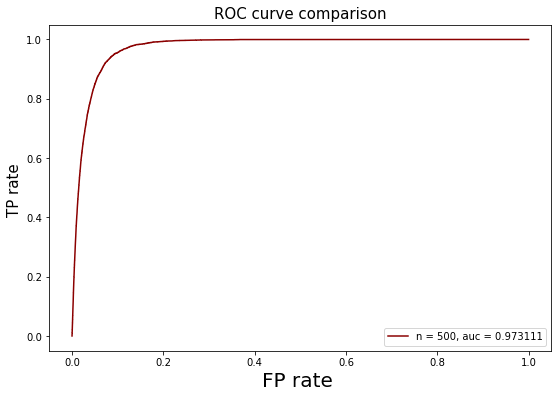

In [7]:
from sklearn.metrics import roc_curve, roc_auc_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

weight = (len(ytrain)-sum(ytrain))/sum(ytrain)

model500 = XGBClassifier()
model500.load_model("/work/aavocone/models/model500.txt")
y500 = model500.predict_proba(xtest)[:,1]


#n=500
auc500 =roc_auc_score(ytest,y500)
fp500,tp500, thresh500 = roc_curve(ytest, y500)

plt.figure(figsize=(9,6))
plt.plot(fp500, tp500, label = f"n = 500, auc = {auc500:3f}", color ="darkred")
plt.title(f"ROC curve comparison", fontsize = 15)
plt.xlabel("FP rate ", fontsize = 20)
plt.ylabel("TP rate ", fontsize = 15)
plt.legend()
plt.savefig(f"/work/aavocone/week9/ROC_oversample.jpeg")
plt.show()

### TO DO: mit dem ROC von vorher vergleichen und undersampling